In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
data_dir = '/ssd/disk/ur5_tidying_data/pybullet_single_bg/images'
seg_list = sorted([os.path.join(data_dir, s) for s in os.listdir(data_dir) if s.startswith('seg_')])
rgb_list = sorted([os.path.join(data_dir, r) for r in os.listdir(data_dir) if r.startswith('rgb_')])

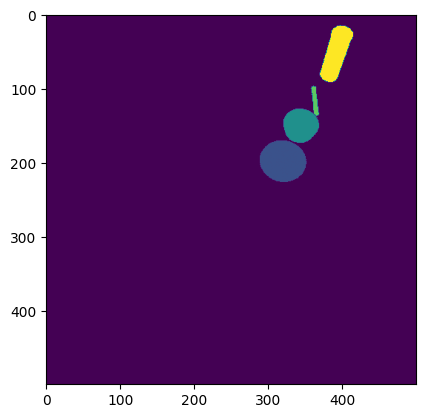

In [3]:
seg0 = np.flip(np.load(seg_list[0]), 0)
plt.imshow(seg0)

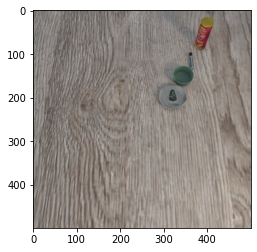

In [133]:
rgb0 = np.array(Image.open(rgb_list[0]))
plt.imshow(rgb0)

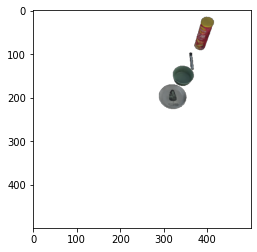

In [134]:
plt.imshow(rgb0 * (seg0!=0).reshape(500, 500, 1))

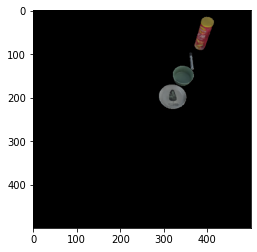

In [135]:
plt.imshow((rgb0 * (seg0!=0).reshape(500, 500, 1))[:, :, :3])

In [136]:
py, px = np.where(seg0==2)

In [137]:
min_y, max_y = np.min(py), np.max(py)
min_x, max_x = np.min(px), np.max(px)

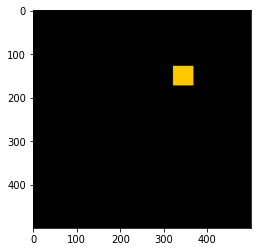

In [138]:
empty = np.zeros_like(rgb0[:, :, :3])
empty[min_y:max_y, min_x:max_x] = [255, 200, 0]
plt.imshow(empty)

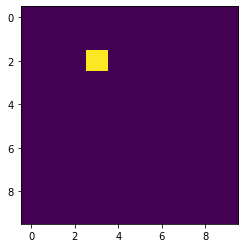

In [139]:
empty = np.zeros([10, 10])
empty[2, 3] = 1
plt.imshow(empty)

In [140]:
py, px = np.where(seg0==1)
cy, cx = np.mean(py), np.mean(px)

In [141]:
im0 = Image.open(rgb_list[0])
im1 = Image.open(rgb_list[10])
mask0 = Image.fromarray(255 * (seg0==1).astype(np.uint8))

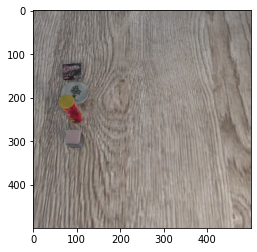

In [142]:
t = np.round(np.array([100, 400]) - [cx, cy]).astype(int)
im1.paste(im0, (t[1], t[0]), mask0)
plt.imshow(np.array(im1))

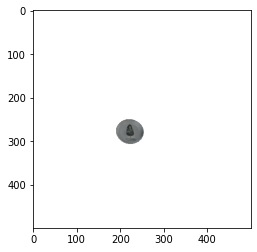

In [147]:
im2 = Image.fromarray(np.zeros_like(rgb0))
t = np.round(np.array([400, 100]) - [cx, cy]).astype(int)
im2.paste(im0, (t[1], t[0]), mask0)
plt.imshow(np.array(im2))